### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Revised Regression Analysis using the reduced dataframe

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing Dataframes
path = r'C:\Users\franz\Documents\Exercise_6\01_Data\prepared_data\cleaned_data'
df_all = pd.read_csv(os.path.join(path, 'combined_data.csv'), usecols = all)

In [3]:
df_relevant = df_all.filter(['price','payment_value'], axis=1)

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# Data cleaning

In [6]:
df_relevant.shape

(113216, 2)

In [7]:
df_relevant.head()

,price,payment_value
0,29.99,18.12
1,29.99,2.00
2,29.99,18.59
3,29.99,37.77
4,29.99,37.77


##### Missing values

In [8]:
# Check for missing values

df_relevant.isnull().sum()

# No missing values to handle

price            0
payment_value    0
dtype: int64

##### Duplicates check

In [9]:
dups = df_relevant.duplicated()

In [10]:
dups.shape # No dups

(113216,)

##### Extreme values checks

C:\Users\franz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

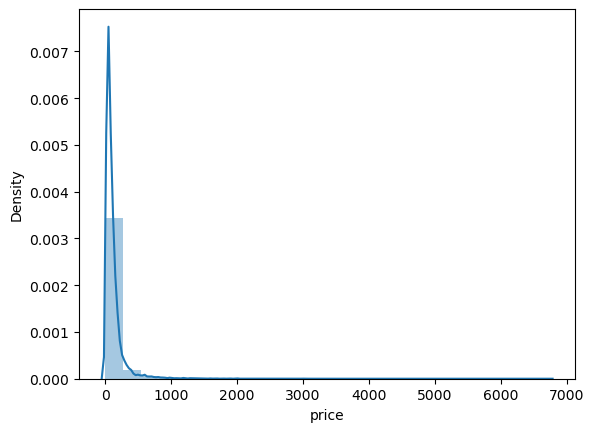

In [11]:
sns.distplot(df_relevant['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\franz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payment_value', ylabel='Density'>

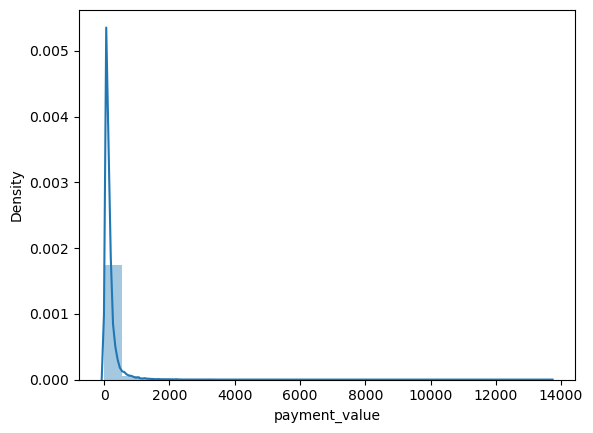

In [12]:
sns.distplot(df_relevant['payment_value'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df_relevant['price'].mean() # Check the mean

119.86973996619442

In [17]:
df_relevant['payment_value'].mean() # Check the mean

171.57792476327575

In [15]:
df_relevant['price'].median() # Check the median

74.9

In [18]:
df_relevant['payment_value'].median() # Check the median

107.97

In [16]:
df_relevant['price'].max() # Check the maximum value

6735.0

In [19]:
df_relevant['price'].max() # Check the maximum value

6735.0

### 3. Data prep for regression analysis 

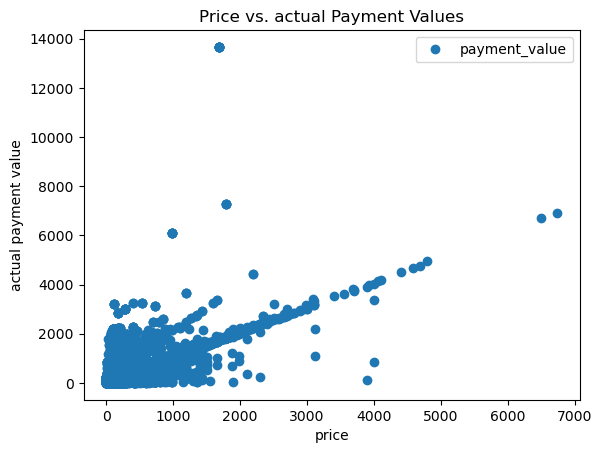

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relevant.plot(x = 'price', y='payment_value',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs. actual Payment Values')  
plt.xlabel('price')  
plt.ylabel('actual payment value')  
plt.show()

#### Hypothesis: 
##### If the price of a product is high, the actual payment value paid by the customers is high as well.

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_relevant['price'].values.reshape(-1,1)
y = df_relevant['payment_value'].values.reshape(-1,1)

In [22]:
X

array([[29.99],
       [29.99],
       [29.99],
       ...,
       [55.9 ],
       [72.  ],
       [68.5 ]])

In [23]:
y

array([[18.12],
       [ 2.  ],
       [18.59],
       ...,
       [71.04],
       [85.08],
       [86.86]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

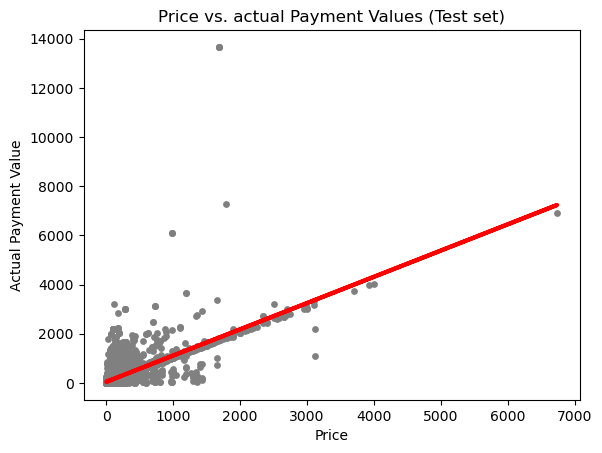

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs. actual Payment Values (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Actual Payment Value')
plot_test.show()

When the price is high (> 1.500 dollars), the payment value is driven down almost linearly. It doesn’t play as large a role when the price is less. There is a wide dispersion of points. As this is also where we have the highest density of points within the data, this confirms a single regression line as not being the most accurate prediction model. 

In addition, in this case, a differentiation of the payment value per product (instead of per order) would be necessary. The fact that a payment value can conceal the payment value for not just one but several products is the reason why many orders were supposedly paid for more than the product cost. This makes no sense and therefore these points should be ignored. 

The remaining data points can then be used to determine, for example, what the return rates or price reductions look like.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.06812002]]
Mean squared error:  39561.51491050881
R2 score:  0.5078147911905107


Dropping rows with irrelevant orders due to payment value being higher than the products price:

In [34]:
df_relevant.loc[df_relevant['payment_value'] <= df_relevant['price'], 'regression_usefullness'] = 'useful_order'
df_relevant.loc[df_relevant['payment_value'] > df_relevant['price'], 'regression_usefullness'] = 'irrelevant_order'

In [42]:
df_relevant['regression_usefullness'].value_counts(dropna = False)

irrelevant_order    106744
useful_order          6472
Name: regression_usefullness, dtype: int64

In [43]:
df_relevant.shape

(113216, 3)

Only 6472 Rows out of 113216 Rows can be used for the regression analysis. However, as 5.000 Rows are the minimum requirement, we proceed that way.

In [39]:
df_relevant.head()

,price,payment_value,regression_usefullness
0,29.99,18.12,useful_order
1,29.99,2.00,useful_order
2,29.99,18.59,useful_order
3,29.99,37.77,irrelevant_order
4,29.99,37.77,irrelevant_order


In [49]:
# dropping irrelevant_order rows
df_relevant.drop(df_relevant.loc[df_relevant['regression_usefullness'] == 'irrelevant_order'].index, inplace=True)

In [54]:
df_relevant.shape

(6472, 3)

Only the orders containing 1 article are left. 

### 5. Revised Regression Analysis using the reduced dataframe

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_relevant['price'].values.reshape(-1,1)
y = df_relevant['payment_value'].values.reshape(-1,1)

In [56]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [58]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

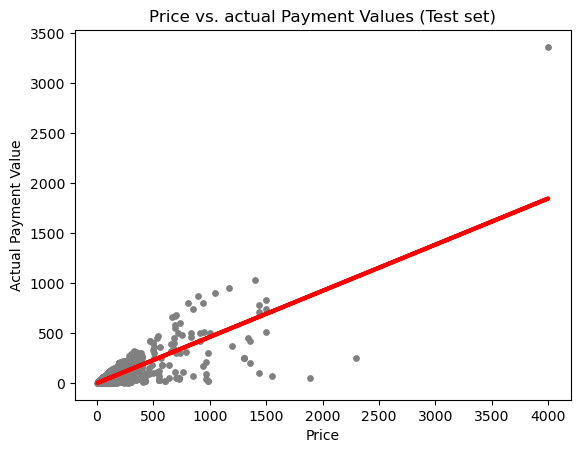

In [60]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs. actual Payment Values (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Actual Payment Value')
plot_test.show()

In [62]:
df_relevant['price'].mean() # Check the mean

135.36959981458992

In [63]:
df_relevant['payment_value'].mean() # Check the mean

59.46558405438811

In [64]:
df_relevant['price'].median() # Check the median

79.99

In [66]:
df_relevant['payment_value'].median() # Check the median

25.77

This model can be better used to predict the expected actual sales per product, which also means how high the return rate is likely to be or how high any discounts might be. Here, however, further differentiation by product category or by seller would be useful. The likelihood that, for example, a product from the food category that costs 50 dollars will behave identically to a product from the toy category in terms of expected actual sales is extremely unlikely. 

In [73]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [74]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46189529]]
Mean squared error:  6116.748713791757
R2 score:  0.5868462642352819


The slope is positive, meaning if the price increases, then the payment value does as well with a degree of 0.46, This is great!
The R2 (r-squared value is a metric which tells how well the model explains the variance in the data. It is a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. The R2 score for the model is 0.59, meaning 59% out of one hundred. It is not a too great fit, but better than before reducing the dataframe. 

In [75]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.23,14.923650
1,25.00,52.568116
2,25.00,20.420204
3,25.00,36.124644
4,4.74,24.161556
5,23.27,11.223868
6,182.56,95.755326
7,6.66,16.766612
8,24.51,13.999859
9,108.71,242.638028


Indeed, there is a huge deviation between the predicted and actual payment values. I think this could be improved by adding further variables to the regression analysis, like product category or seller. 